### Import required libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### Setup plotting style

In [2]:
# Use a compatible matplotlib style and seaborn settings
plt.style.use('default')  # Use default matplotlib style
sns.set_theme(style="darkgrid")  # Modern seaborn theme setting
sns.set_palette("husl")
%matplotlib inline

# Additional styling for better plots
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

### Load the data

In [3]:
'''
    Test Case 1:
          - Train client is a Laptop connected to 5G network
          - Web client is a Laptop connected to 5G network
'''
#filename =  './29_08_2025/pre_processed/processed_Train_Client(Laptop)_Web_Client(Laptop)_e1c07b43-9e1e-4438-ade8-a320a030e494_Latency.json'


'''
    Test Case 2:
          - Train client is a Laptop connected to 5G network
          - Web client is a Phone connected to 5G network
'''
# filename =  './29_08_2025/pre_processed/processed_Train_Client(Laptop)_Web_Client(Mobile_DE)_5d6a5a85-6566-45b9-8b57-48e886539e0b_Latency.json'


'''
    Test Case 3:
          - Train client is a Laptop connected to 5G network (Germany)
          - Web client is a Phone connected to 4G network (Bangladesh)
'''
# filename =  './29_08_2025/pre_processed/processed_Train_Client(Laptop)_Web_Client(Mobile_BD)_1bdb4d47-a2e0-4148-a721-796cf6ff755b_Latency.json'

'''
    Test Case 4:
          - Train client is reakt-Tiny connected to Wifi network
          - Web client is a Laptop connected to Wifi network
'''
filename =  './11_12_2025/train_e127f95e-e9a0-46d4-9ac0-6b9783533ec2_latency_1765452450000_1765452650000.json'

with open(filename, 'r') as file:
    data = json.load(file)

print(f"Data loaded successfully from {filename}")
print(f"Data type: {type(data)}")
print(f"Data keys: {list(data.keys()) if isinstance(data, dict) else 'Not a dictionary'}")

# Convert to DataFrames for easier analysis
telemetry_df = pd.DataFrame(data['telemetryLatencies'])
video_df = pd.DataFrame(data['videoLatencies'])

# Create a summary DataFrame from statistics
protocols = ['websocket', 'webtransport', 'mqtt']
stats_data = []
for protocol in protocols:
    stats_data.append({
        'protocol': protocol,
        'count': data['statistics'][protocol]['count'],
        'avg': data['statistics'][protocol]['avg'],
        'min': data['statistics'][protocol]['min'],
        'max': data['statistics'][protocol]['max']
    })
stats_df = pd.DataFrame(stats_data)

Data loaded successfully from ./11_12_2025/train_e127f95e-e9a0-46d4-9ac0-6b9783533ec2_latency_1765452450000_1765452650000.json
Data type: <class 'dict'>
Data keys: ['exportTime', 'statistics', 'telemetryLatencies', 'videoLatencies']


#### 1.1 Basic Statistics Comparison

In [4]:
print("Protocol Statistics Comparison:")
print(stats_df)

Protocol Statistics Comparison:
       protocol  count        avg        min        max
0     websocket      0   0.000000   0.000000   0.000000
1  webtransport      0   0.000000   0.000000   0.000000
2          mqtt    200  39.984999  35.799999  92.799999


#### 1.2 Visualization of protocol performance

Missing values in telemetry data:
MQTT: 0
WebTransport: 200
WebSocket: 200


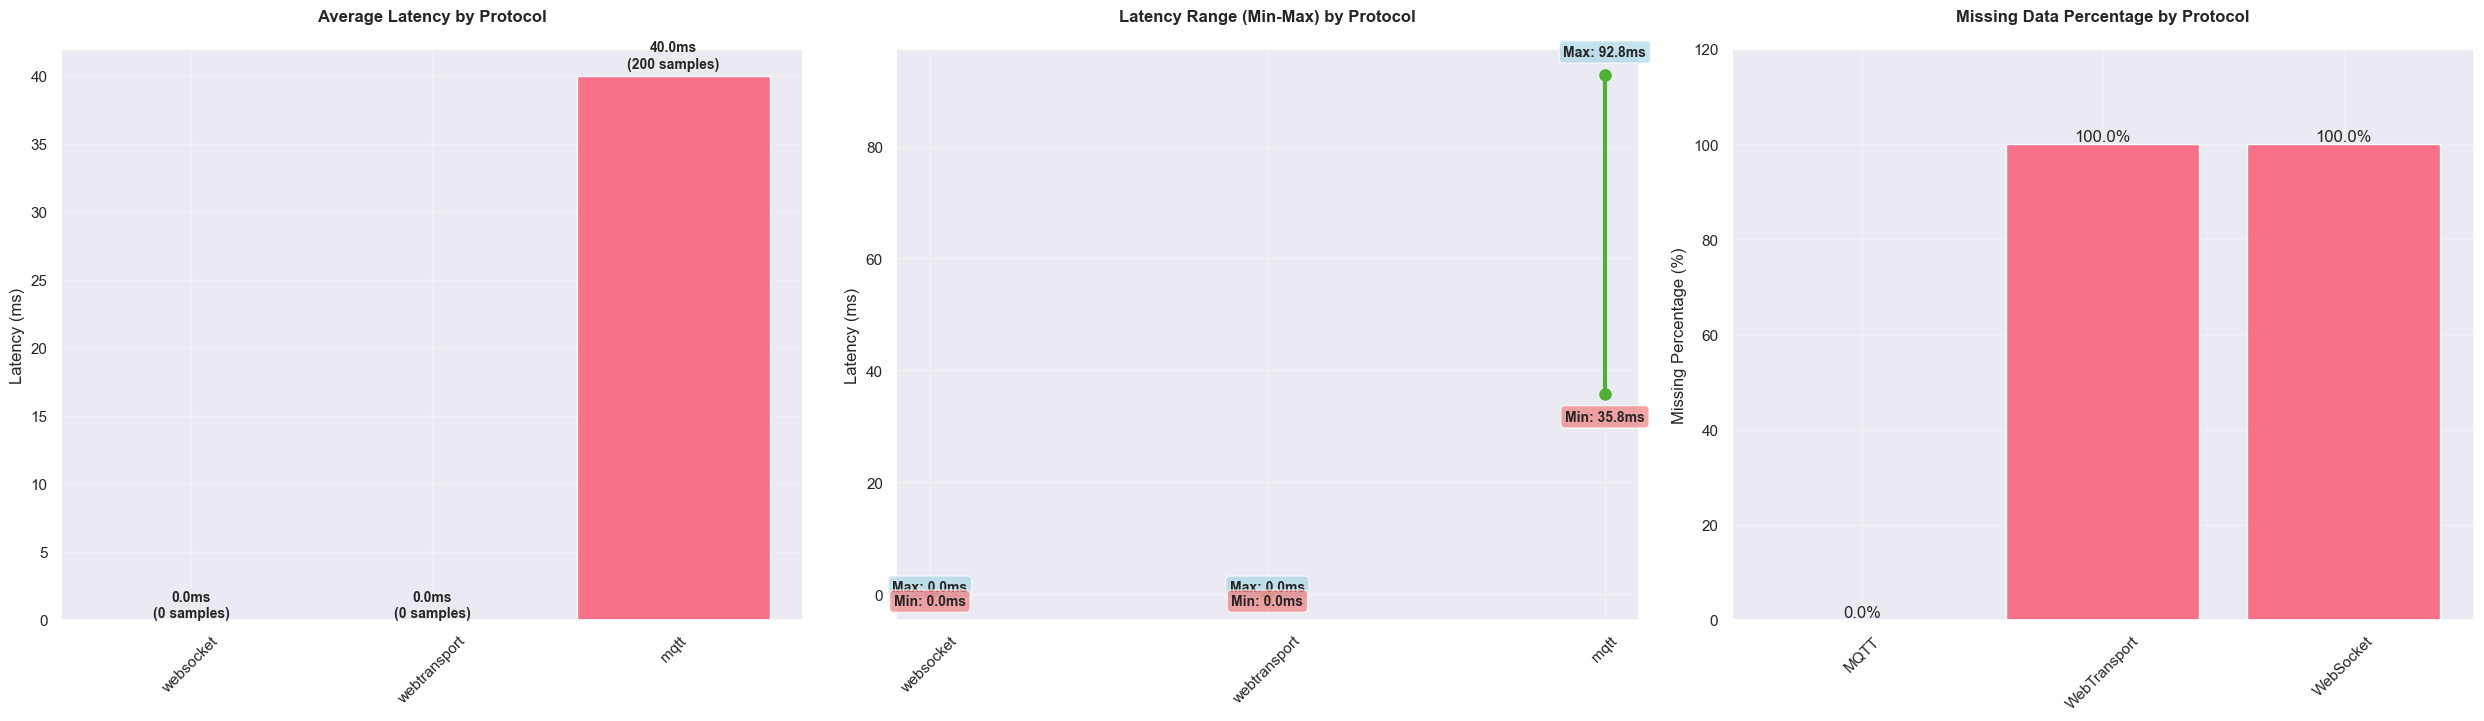


Missing data percentages:
MQTT: 0.00%
WebTransport: 100.00%
WebSocket: 100.00%

Telemetry data processed by each protocol:
websocket: 0 samples
webtransport: 0 samples
mqtt: 200 samples


In [5]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))  # Increased figure height

# Average latency by protocol with data count labels
bars_avg = axes[0].bar(stats_df['protocol'], stats_df['avg'])
axes[0].set_title('Average Latency by Protocol', fontsize=12, fontweight='bold', pad=20)
axes[0].set_ylabel('Latency (ms)')
axes[0].tick_params(axis='x', rotation=45)

# Add count labels on top of average latency bars
for i, (bar, row) in enumerate(zip(bars_avg, stats_df.itertuples())):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{row.avg:.1f}ms\n({row.count} samples)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Min-Max latency range
for i, row in stats_df.iterrows():
    axes[1].plot([row['protocol'], row['protocol']], [row['min'], row['max']],
                   marker='o', linewidth=3, markersize=8)

    # Add labels for min and max values
    # Label for maximum value (top)
    axes[1].text(i, row['max'] + (row['max'] - row['min']) * 0.05,
                f'Max: {row["max"]:.1f}ms',
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

    # Label for minimum value (bottom)
    axes[1].text(i, row['min'] - (row['max'] - row['min']) * 0.05,
                f'Min: {row["min"]:.1f}ms',
                ha='center', va='top', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))

axes[1].set_title('Latency Range (Min-Max) by Protocol', fontsize=12, fontweight='bold', pad=20)
axes[1].set_ylabel('Latency (ms)')
axes[1].tick_params(axis='x', rotation=45)

# Check for missing values in telemetry data
print("Missing values in telemetry data:")
print(f"MQTT: {telemetry_df['mqtt'].isna().sum()}")
print(f"WebTransport: {telemetry_df['wt'].isna().sum()}")
print(f"WebSocket: {telemetry_df['ws'].isna().sum()}")

# Calculate missing percentages
total_records = len(telemetry_df)
missing_percentages = {
    'MQTT': (telemetry_df['mqtt'].isna().sum() / total_records) * 100,
    'WebTransport': (telemetry_df['wt'].isna().sum() / total_records) * 100,
    'WebSocket': (telemetry_df['ws'].isna().sum() / total_records) * 100
}

# Missing percentage by protocol
protocols_missing = list(missing_percentages.keys())
percentages = list(missing_percentages.values())

bars = axes[2].bar(protocols_missing, percentages)
axes[2].set_title('Missing Data Percentage by Protocol', fontsize=12, fontweight='bold', pad=20)
axes[2].set_ylabel('Missing Percentage (%)')
axes[2].tick_params(axis='x', rotation=45)

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{percentage:.1f}%', ha='center', va='bottom')

# Set y-axis limit for better visualization
axes[2].set_ylim(0, max(percentages) * 1.2 if max(percentages) > 0 else 10)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Add extra space at the top for the titles
plt.show()

print(f"\nMissing data percentages:")
for protocol, percentage in missing_percentages.items():
    print(f"{protocol}: {percentage:.2f}%")

# Print telemetry data count summary
print(f"\nTelemetry data processed by each protocol:")
for _, row in stats_df.iterrows():
    print(f"{row['protocol']}: {row['count']} samples")

#### 2.1 Time Series analysis of telemetry data

In [6]:
# Check data shape and info
print(f"\nTelemetry data shape: {telemetry_df.shape}")
print(f"Sequence ID range: {telemetry_df['sequence_id'].min()} - {telemetry_df['sequence_id'].max()}")

# Display first few rows to understand the data structure
print("\nFirst 10 rows of telemetry data:")
print(telemetry_df.head(10))


Telemetry data shape: (200, 4)
Sequence ID range: 49 - 248

First 10 rows of telemetry data:
   sequence_id       mqtt    wt    ws
0           49  36.799999  None  None
1           50  37.799999  None  None
2           51  36.799999  None  None
3           52  37.799999  None  None
4           53  35.799999  None  None
5           54  37.799999  None  None
6           55  36.799999  None  None
7           56  36.799999  None  None
8           57  36.799999  None  None
9           58  36.799999  None  None


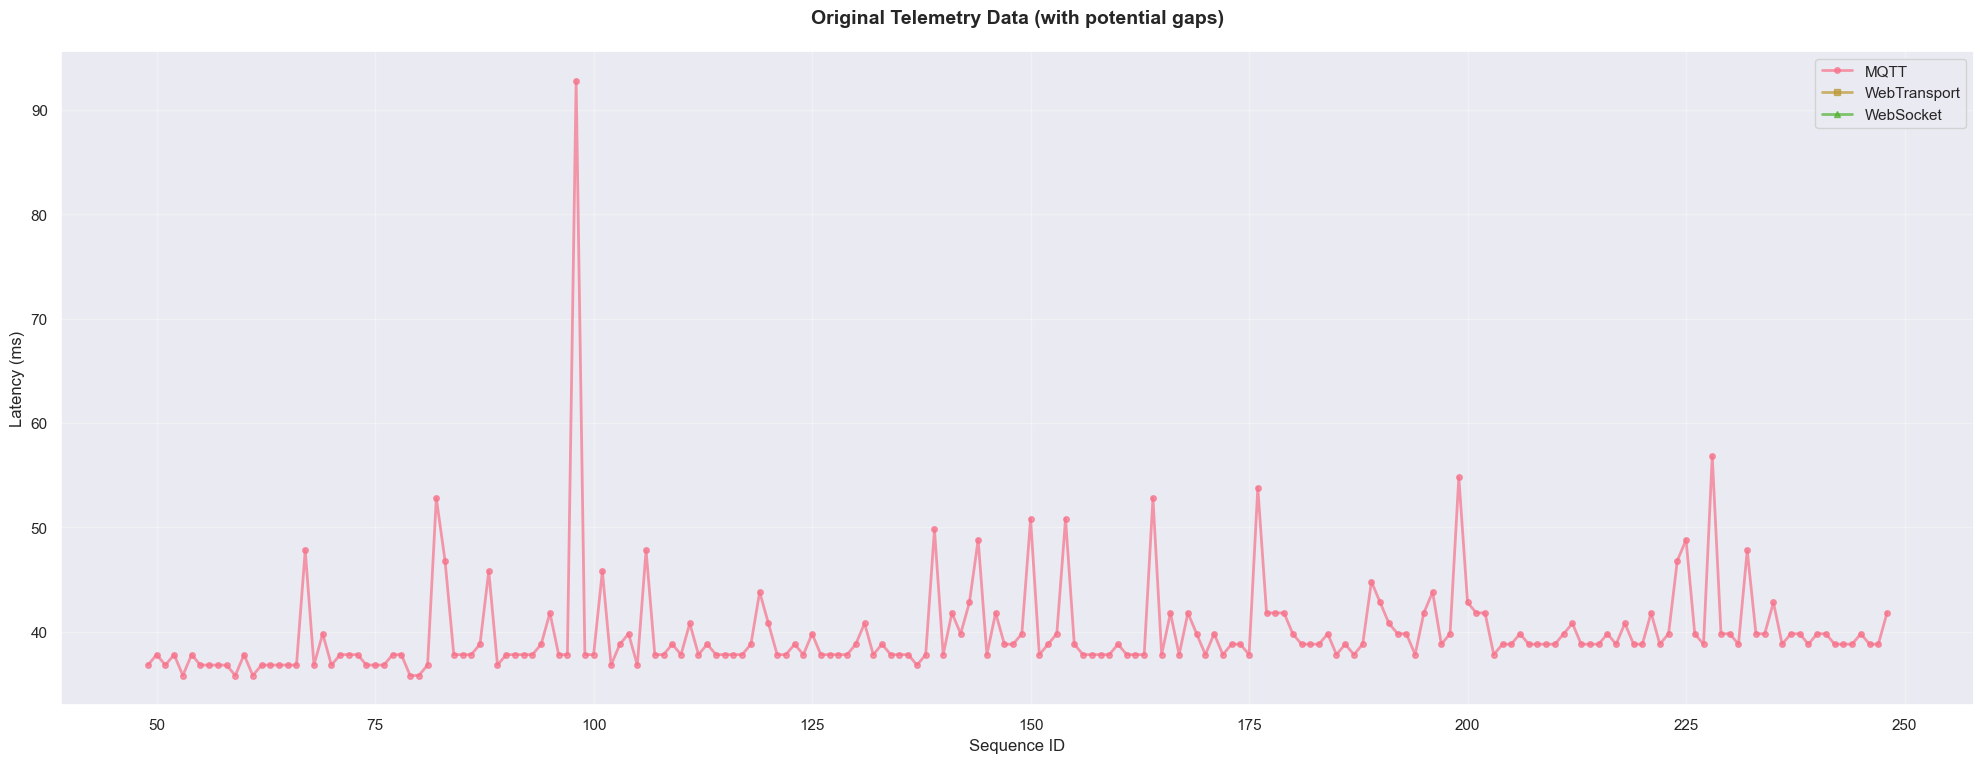

In [7]:
# Comparison: Original data with gaps vs Interpolated data
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))

# Original data (with potential gaps)
ax1.plot(telemetry_df['sequence_id'], telemetry_df['mqtt'], marker='o', label='MQTT', linewidth=2, markersize=4, alpha=0.7)
ax1.plot(telemetry_df['sequence_id'], telemetry_df['wt'], marker='s', label='WebTransport', linewidth=2, markersize=4, alpha=0.7)
ax1.plot(telemetry_df['sequence_id'], telemetry_df['ws'], marker='^', label='WebSocket', linewidth=2, markersize=4, alpha=0.7)
ax1.set_xlabel('Sequence ID')
ax1.set_ylabel('Latency (ms)')
ax1.set_title('Original Telemetry Data (with potential gaps)', fontsize=14, fontweight='bold', pad=20)
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add extra space at the top for the title
plt.show()

#### 2.2 Cumulative Latency Analysis for telemetry data

In [8]:
# Create cumulative latency data with interpolation for null values
telemetry_clean_cumulative = telemetry_df.copy()

# First, interpolate null values for each protocol
print("Before interpolation:")
print(f"MQTT null values: {telemetry_clean_cumulative['mqtt'].isna().sum()}")
print(f"WebTransport null values: {telemetry_clean_cumulative['wt'].isna().sum()}")
print(f"WebSocket null values: {telemetry_clean_cumulative['ws'].isna().sum()}")

# Interpolate missing values using linear interpolation
telemetry_clean_cumulative['mqtt'] = telemetry_clean_cumulative['mqtt'].interpolate(method='linear')
telemetry_clean_cumulative['wt'] = telemetry_clean_cumulative['wt'].interpolate(method='linear')
telemetry_clean_cumulative['ws'] = telemetry_clean_cumulative['ws'].interpolate(method='linear')

print("\nAfter interpolation:")
print(f"MQTT null values: {telemetry_clean_cumulative['mqtt'].isna().sum()}")
print(f"WebTransport null values: {telemetry_clean_cumulative['wt'].isna().sum()}")
print(f"WebSocket null values: {telemetry_clean_cumulative['ws'].isna().sum()}")

# Calculate cumulative latencies for each protocol
telemetry_clean_cumulative['mqtt_cumulative'] = telemetry_clean_cumulative['mqtt'].cumsum()
telemetry_clean_cumulative['wt_cumulative'] = telemetry_clean_cumulative['wt'].cumsum()
telemetry_clean_cumulative['ws_cumulative'] = telemetry_clean_cumulative['ws'].cumsum()

print("\nCumulative latency data created successfully!")
print(f"Shape: {telemetry_clean_cumulative.shape}")
print("\nFirst 10 rows of cumulative data:")
print(telemetry_clean_cumulative[['sequence_id', 'mqtt_cumulative', 'wt_cumulative', 'ws_cumulative']].head(10))
print("\nLast 10 rows of cumulative data:")
print(telemetry_clean_cumulative[['sequence_id', 'mqtt_cumulative', 'wt_cumulative', 'ws_cumulative']].tail(10))

Before interpolation:
MQTT null values: 0
WebTransport null values: 200
WebSocket null values: 200

After interpolation:
MQTT null values: 0
WebTransport null values: 200
WebSocket null values: 200

Cumulative latency data created successfully!
Shape: (200, 7)

First 10 rows of cumulative data:
   sequence_id  mqtt_cumulative wt_cumulative ws_cumulative
0           49        36.799999           NaN           NaN
1           50        74.599998           NaN           NaN
2           51       111.399998           NaN           NaN
3           52       149.199997           NaN           NaN
4           53       184.999996           NaN           NaN
5           54       222.799995           NaN           NaN
6           55       259.599995           NaN           NaN
7           56       296.399994           NaN           NaN
8           57       333.199993           NaN           NaN
9           58       369.999992           NaN           NaN

Last 10 rows of cumulative data:
     seque

C:\Users\rajib\AppData\Local\Temp\ipykernel_31136\364411943.py:12: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  telemetry_clean_cumulative['wt'] = telemetry_clean_cumulative['wt'].interpolate(method='linear')
C:\Users\rajib\AppData\Local\Temp\ipykernel_31136\364411943.py:13: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  telemetry_clean_cumulative['ws'] = telemetry_clean_cumulative['ws'].interpolate(method='linear')


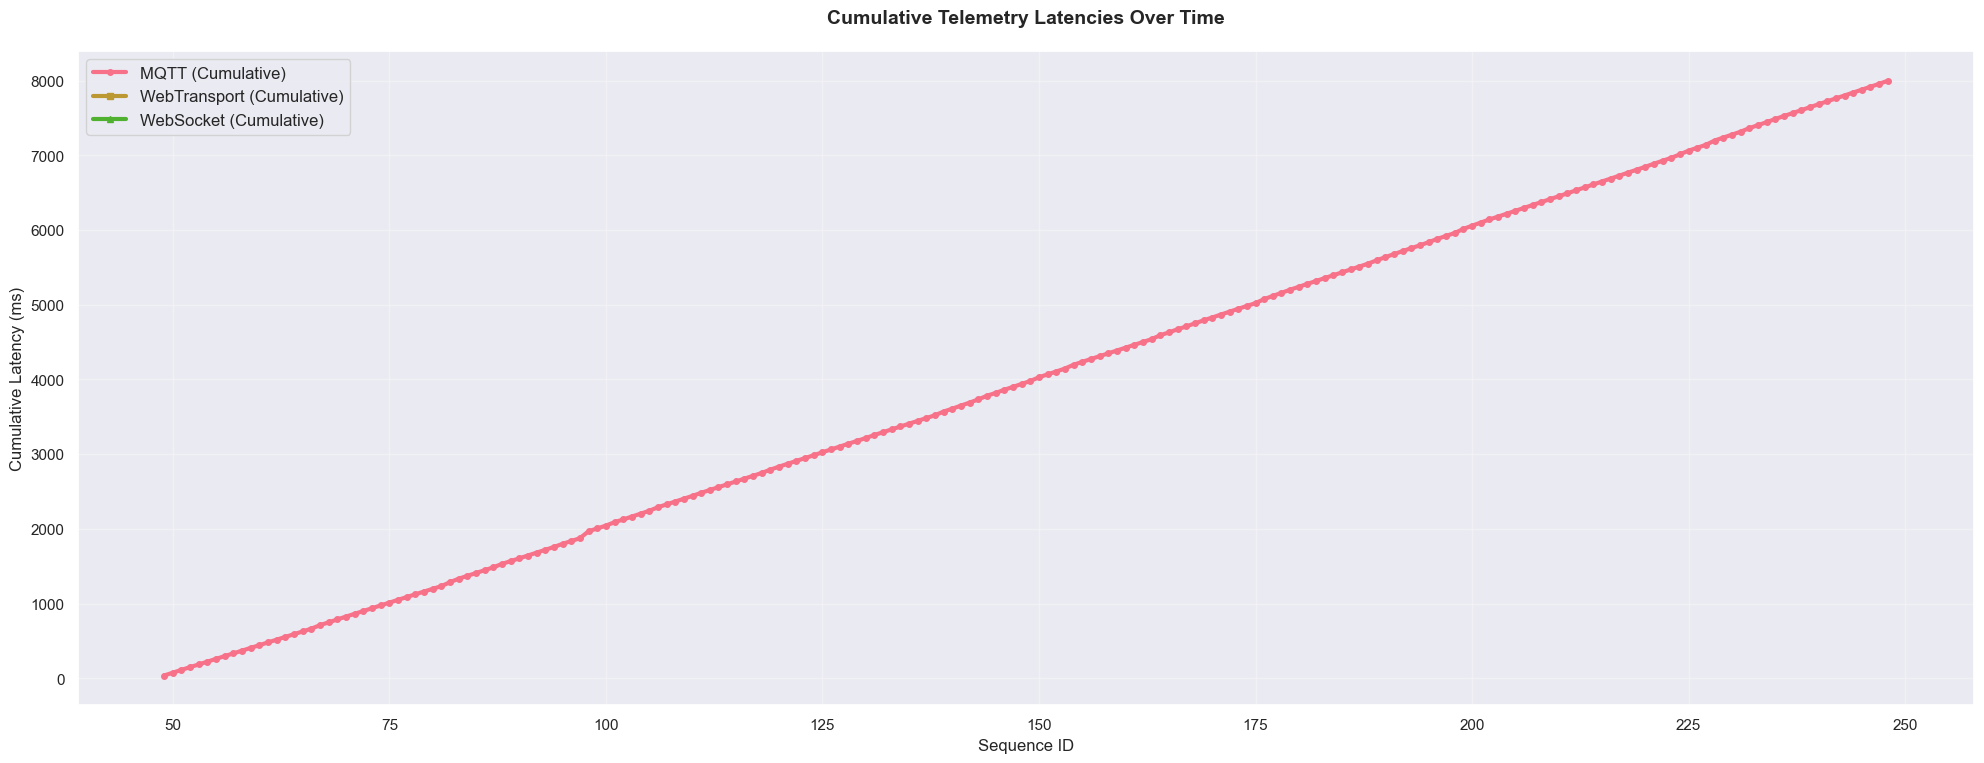

In [9]:
# Plot cumulative latencies
plt.figure(figsize=(20, 8))
plt.plot(telemetry_clean_cumulative['sequence_id'], telemetry_clean_cumulative['mqtt_cumulative'],
         marker='o', label='MQTT (Cumulative)', linewidth=3, markersize=4)
plt.plot(telemetry_clean_cumulative['sequence_id'], telemetry_clean_cumulative['wt_cumulative'],
         marker='s', label='WebTransport (Cumulative)', linewidth=3, markersize=4)
plt.plot(telemetry_clean_cumulative['sequence_id'], telemetry_clean_cumulative['ws_cumulative'],
         marker='^', label='WebSocket (Cumulative)', linewidth=3, markersize=4)

plt.xlabel('Sequence ID', fontsize=12)
plt.ylabel('Cumulative Latency (ms)', fontsize=12)
plt.title('Cumulative Telemetry Latencies Over Time', fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add extra space at the top for the title
plt.show()

#### 3. Video Frame Latency Analysis

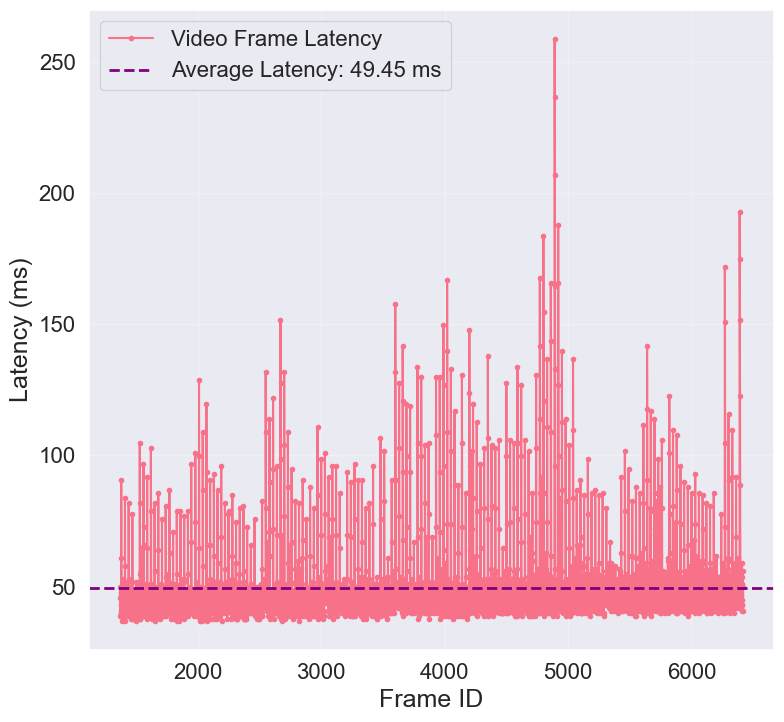

In [13]:
# 3.1 Time series analysis of video latencies
plt.figure(figsize=(8, 8))

# Calculate average latency
avg_latency = video_df['latency'].mean()

# Latency over frame sequence
plt.plot(video_df['frameId'], video_df['latency'], marker='o', markersize=3, label='Video Frame Latency')

# Add horizontal line for average latency
plt.axhline(y=avg_latency, color='purple', linestyle='--', linewidth=2,
           label=f'Average Latency: {avg_latency:.2f} ms')

plt.xlabel('Frame ID', fontsize=18)
plt.ylabel('Latency (ms)', fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add extra space at the top for the title
plt.show()

First received frame ID: 1372
Last received frame ID: 6417
Total expected frames in sequence: 5046
Number of received frames: 5010
Number of missing frames: 36
Missing frame percentage: 0.71%

Missing frame IDs: [1501, 1951, 2000, 2491, 2521, 2581, 2641, 2965, 3181, 3451, 3541, 3571, 3631, 3751, 3901, 3976, 4009, 4111, 4171, 4343, 4471, 4582, 4711, 4741, 4762, 4771, 4847, 4891, 5401, 5609, 5629, 5791, 6211, 6241, 6361, 6387]


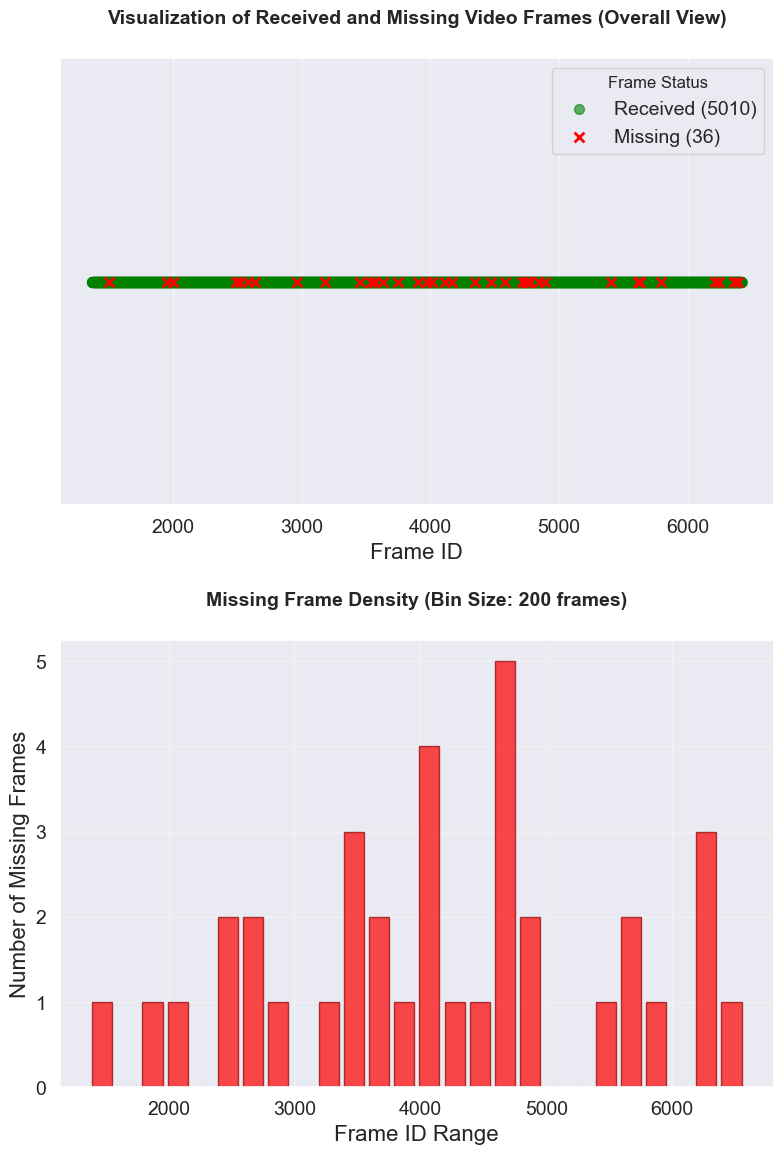


Missing Frame Analysis:
- First missing frame: 1501
- Last missing frame: 6387
- Average gap between consecutive missing frames: 139.6
- Largest gap between consecutive missing frames: 510


In [11]:
# 3.2 Analysis of missing video frames
if not video_df.empty:
    # Find the first and last frame IDs
    first_frame_id = video_df['frameId'].min()
    last_frame_id = video_df['frameId'].max()

    # Calculate the total number of expected frames
    total_expected_frames = last_frame_id - first_frame_id + 1

    # Calculate the number of received frames
    received_frames_count = len(video_df)

    # Calculate the number of missing frames
    missing_frames_count = total_expected_frames - received_frames_count

    print(f"First received frame ID: {first_frame_id}")
    print(f"Last received frame ID: {last_frame_id}")
    print(f"Total expected frames in sequence: {total_expected_frames}")
    print(f"Number of received frames: {received_frames_count}")
    print(f"Number of missing frames: {missing_frames_count}")
    print(f"Missing frame percentage: {(missing_frames_count/total_expected_frames)*100:.2f}%")

    # Identify the missing frame IDs
    expected_frame_ids = set(range(first_frame_id, last_frame_id + 1))
    received_frame_ids = set(video_df['frameId'])
    missing_frame_ids = sorted(list(expected_frame_ids - received_frame_ids))

    print(f"\nMissing frame IDs: {missing_frame_ids if missing_frames_count > 0 else 'None'}")

    # Create visualizations
    fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # Increased figure height

    # 1. Overall view with improved markers
    all_frames = pd.DataFrame({'frameId': list(range(first_frame_id, last_frame_id + 1))})
    all_frames['status'] = 'Missing'
    all_frames.loc[all_frames['frameId'].isin(received_frame_ids), 'status'] = 'Received'

    # Plot with larger, more visible markers
    received_data = all_frames[all_frames['status'] == 'Received']
    missing_data = all_frames[all_frames['status'] == 'Missing']

    axes[0].scatter(received_data['frameId'], [1]*len(received_data), 
                   c='green', alpha=0.6, s=50, marker='o', label=f'Received ({len(received_data)})')
    axes[0].scatter(missing_data['frameId'], [1]*len(missing_data), 
                   c='red', s=50, marker='x', label=f'Missing ({len(missing_data)})', linewidths=2)

    axes[0].set_title('Visualization of Received and Missing Video Frames (Overall View)', 
                     fontsize=14, fontweight='bold', pad=25)  # Increased padding
    axes[0].set_xlabel('Frame ID', fontsize=16)
    axes[0].set_yticks([])
    axes[0].set_ylabel('')
    axes[0].legend(title='Frame Status', fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=14)
    axes[0].grid(True, axis='x', linestyle='--', alpha=0.6)

    # 2. Missing frames density visualization
    if missing_frame_ids:
        # Create bins to show missing frame density
        bin_size = 200  # frames per bin
        bins = range(first_frame_id, last_frame_id + bin_size, bin_size)
        missing_counts, bin_edges = np.histogram(missing_frame_ids, bins=bins)
        bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

        axes[1].bar(bin_centers, missing_counts, width=bin_size*0.8, alpha=0.7, color='red', edgecolor='darkred')
        axes[1].set_title(f'Missing Frame Density (Bin Size: {bin_size} frames)', 
                         fontsize=14, fontweight='bold', pad=25)  # Increased padding
        axes[1].set_xlabel('Frame ID Range', fontsize=16)
        axes[1].set_ylabel('Number of Missing Frames', fontsize=16)
        axes[1].tick_params(axis='both', which='major', labelsize=14)
        axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.3)  # Add extra space at top and between subplots
    plt.show()

    # Print summary statistics
    if missing_frame_ids:
        print(f"\nMissing Frame Analysis:")
        print(f"- First missing frame: {min(missing_frame_ids)}")
        print(f"- Last missing frame: {max(missing_frame_ids)}")
        print(f"- Average gap between consecutive missing frames: {np.mean(np.diff(missing_frame_ids)):.1f}")
        print(f"- Largest gap between consecutive missing frames: {max(np.diff(missing_frame_ids))}")

else:
    print("Video data is empty. Cannot perform missing frame analysis.")

#### 4. Command Latency Analysis

In [15]:
# load file
file_command_latency = "./11_12_2025/latency_command.json"

# read the file and parse each line as JSON
command_data = []
with open(file_command_latency, "r") as file:
    for line in file:
        command_data.append(json.loads(line.strip()))

# Display the data
print(f"Total commands loaded: {len(command_data)}")
print("\nFirst few commands:")
for i, cmd in enumerate(command_data[:5]):
    print(f"{i+1}. {cmd}")

# Convert to DataFrame for easier analysis
command_df = pd.DataFrame(command_data)
print("\nDataFrame:")
print(command_df)


Total commands loaded: 54

First few commands:
1. {'remote_control_id': '22d51ee7-55da-4246-b163-15345387b364', 'command_id': 1, 'instruction': 'POWER_OFF', 'latency_ms': 60.5, 'timestamp': 1750243120721}
2. {'remote_control_id': '22d51ee7-55da-4246-b163-15345387b364', 'command_id': 2, 'instruction': 'POWER_ON', 'latency_ms': 69.5, 'timestamp': 1750243122872}
3. {'remote_control_id': '22d51ee7-55da-4246-b163-15345387b364', 'command_id': 3, 'instruction': 'POWER_OFF', 'latency_ms': 56.5, 'timestamp': 1750243129800}
4. {'remote_control_id': '22d51ee7-55da-4246-b163-15345387b364', 'command_id': 4, 'instruction': 'POWER_ON', 'latency_ms': 64.5, 'timestamp': 1750243132660}
5. {'remote_control_id': '22d51ee7-55da-4246-b163-15345387b364', 'command_id': 5, 'instruction': 'CHANGE_TARGET_SPEED', 'latency_ms': 67.5, 'timestamp': 1750243136297}

DataFrame:
                       remote_control_id  command_id          instruction  \
0   22d51ee7-55da-4246-b163-15345387b364           1            PO

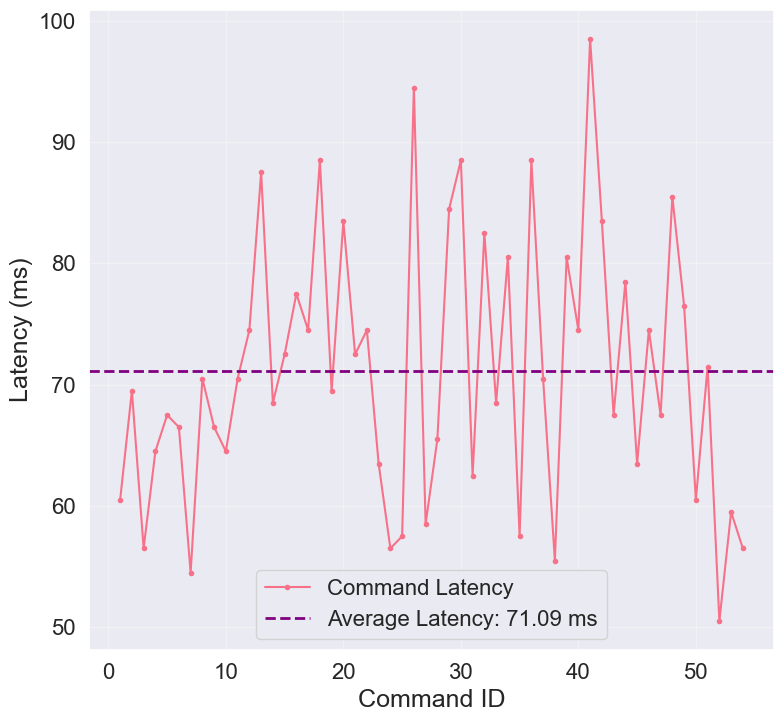

In [ ]:
# 4.1 Time series analysis of command latencies
plt.figure(figsize=(8, 8))

# Calculate average latency
avg_latency = command_df['latency_ms'].mean()

# Latency over command sequence
plt.plot(command_df['command_id'], command_df['latency_ms'], marker='o', markersize=3, label='Command Latency')

# Add horizontal line for average latency
plt.axhline(y=avg_latency, color='purple', linestyle='--', linewidth=2,
           label=f'Average Latency: {avg_latency:.2f} ms')

plt.xlabel('Command ID', fontsize=18)
plt.ylabel('Latency (ms)', fontsize=18)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add extra space at the top for the title
plt.show()


First received command ID: 1
Last received command ID: 54
Total expected commands in sequence: 54
Number of received commands: 54
Number of missing commands: 0
Missing command percentage: 0.00%

Missing command IDs: None


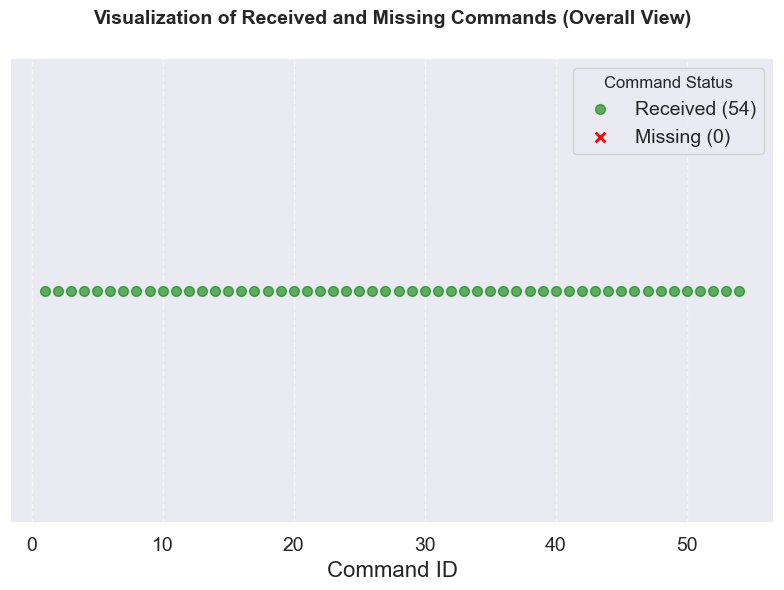

In [18]:
# 4.2 Analysis of missing commands
if not command_df.empty:
    # Find the first and last command IDs
    first_command_id = command_df['command_id'].min()
    last_command_id = command_df['command_id'].max()

    # Calculate the total number of expected commands
    total_expected_commands = last_command_id - first_command_id + 1

    # Calculate the number of received commands
    received_commands_count = len(command_df)

    # Calculate the number of missing commands
    missing_commands_count = total_expected_commands - received_commands_count

    print(f"First received command ID: {first_command_id}")
    print(f"Last received command ID: {last_command_id}")
    print(f"Total expected commands in sequence: {total_expected_commands}")
    print(f"Number of received commands: {received_commands_count}")
    print(f"Number of missing commands: {missing_commands_count}")
    print(f"Missing command percentage: {(missing_commands_count/total_expected_commands)*100:.2f}%")

    # Identify the missing command IDs
    expected_command_ids = set(range(first_command_id, last_command_id + 1))
    received_command_ids = set(command_df['command_id'])
    missing_command_ids = sorted(list(expected_command_ids - received_command_ids))

    print(f"\nMissing command IDs: {missing_command_ids if missing_commands_count > 0 else 'None'}")

    # Create visualization - only upper part
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Overall view with improved markers
    all_commands = pd.DataFrame({'command_id': list(range(first_command_id, last_command_id + 1))})
    all_commands['status'] = 'Missing'
    all_commands.loc[all_commands['command_id'].isin(received_command_ids), 'status'] = 'Received'

    # Plot with larger, more visible markers
    received_data = all_commands[all_commands['status'] == 'Received']
    missing_data = all_commands[all_commands['status'] == 'Missing']

    ax.scatter(received_data['command_id'], [1]*len(received_data), 
               c='green', alpha=0.6, s=50, marker='o', label=f'Received ({len(received_data)})')
    ax.scatter(missing_data['command_id'], [1]*len(missing_data), 
               c='red', s=50, marker='x', label=f'Missing ({len(missing_data)})', linewidths=2)

    ax.set_title('Visualization of Received and Missing Commands (Overall View)', 
                 fontsize=14, fontweight='bold', pad=25)
    ax.set_xlabel('Command ID', fontsize=16)
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.legend(title='Command Status', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Print summary statistics
    if missing_command_ids:
        print(f"\nMissing Command Analysis:")
        print(f"- First missing command: {min(missing_command_ids)}")
        print(f"- Last missing command: {max(missing_command_ids)}")
        print(f"- Average gap between consecutive missing commands: {np.mean(np.diff(missing_command_ids)):.1f}")
        print(f"- Largest gap between consecutive missing commands: {max(np.diff(missing_command_ids))}")

else:
    print("Command data is empty. Cannot perform missing command analysis.")
